C:\Users\ajed8\AppData\Local\Temp\ipykernel_27016\2895629548.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


Cross-validation scores: [0.80952381 0.85714286 0.79761905 0.75       0.80952381 0.75
 0.83333333 0.8452381  0.85542169 0.81927711]
Mean CV score: 0.8127079747561675


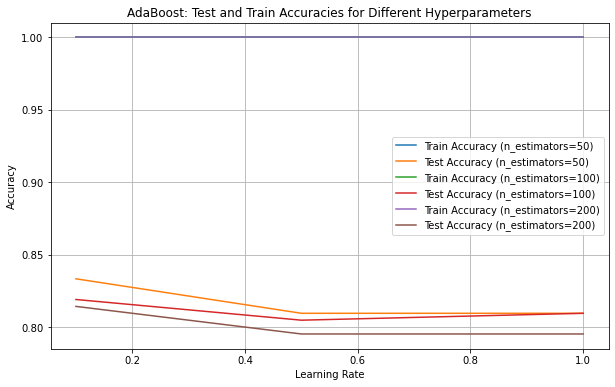

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv("Cleaned.csv")

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

# Define the base estimator for AdaBoost
base_estimator = joblib.load("best_dt_model.pkl")

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_estimator)

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create the AdaBoost classifier with the best hyperparameters
adaboost = AdaBoostClassifier(base_estimator=base_estimator, **best_params)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(adaboost, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Initialize lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Try different hyperparameters
n_estimators_values = [50, 100, 200]
learning_rate_values = [0.1, 0.5, 1.0]

# Iterate over different hyperparameters
for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        # Create the AdaBoost classifier with the current hyperparameters
        adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        
        # Fit the AdaBoost classifier to the training set
        adaboost.fit(X_train, y_train)
        
        # Record training set accuracy
        train_accuracy.append(adaboost.score(X_train, y_train))
        
        # Record test set accuracy
        test_accuracy.append(adaboost.score(X_test, y_test))

# Reshape the accuracy lists for plotting
train_accuracy = np.array(train_accuracy).reshape(len(n_estimators_values), len(learning_rate_values))
test_accuracy = np.array(test_accuracy).reshape(len(n_estimators_values), len(learning_rate_values))

# Plot the test and train accuracies
plt.figure(figsize=(10, 6))
for i, n_estimators in enumerate(n_estimators_values):
    plt.plot(learning_rate_values, train_accuracy[i], label=f"Train Accuracy (n_estimators={n_estimators})")
    plt.plot(learning_rate_values, test_accuracy[i], label=f"Test Accuracy (n_estimators={n_estimators})")

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost: Test and Train Accuracies for Different Hyperparameters")
plt.legend()
plt.grid(True)
plt.show()

# Print the best parameters
print("Best Parameters:", best_params)




In [4]:
joblib.dump(adaboost, 'best_adaboost_dt_model.pkl')

['best_adaboost_dt_model.pkl']

C:\Users\ajed8\AppData\Local\Temp\ipykernel_27016\3382824072.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))
C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


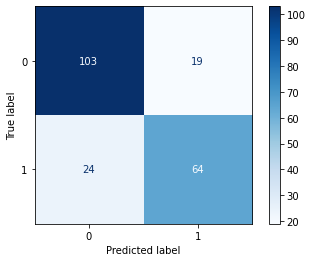

In [18]:
from sklearn.metrics import plot_confusion_matrix
X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


plot_confusion_matrix(adaboost, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [19]:
from sklearn.metrics import f1_score, classification_report
model=adaboost
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.7485380116959065
              precision    recall  f1-score   support

           0      0.811     0.844     0.827       122
           1      0.771     0.727     0.749        88

    accuracy                          0.795       210
   macro avg      0.791     0.786     0.788       210
weighted avg      0.794     0.795     0.794       210



C:\Users\ajed8\AppData\Local\Temp\ipykernel_27016\633419015.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


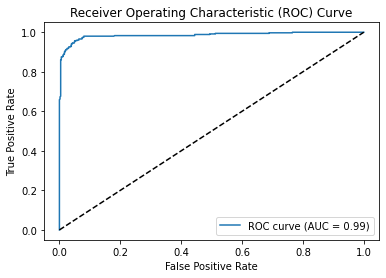

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned.csv")

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

y_scores = adaboost.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
auc

0.9851319912083801